# Project Step 3 - Graph

#### Project Group 7 - Tianqi Zhou - tz232 - Yifei Wu - yw924 - Zixuan Li - zl438

# Initialization



In [1]:
# import libraries required
import random
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import plotly.express as px
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import plotly.graph_objects as go

# set a random seed for the project
random.seed(1024)

## Load the dataset.

In [3]:
# Load Data
X_train_resampled=pd.read_csv('X_train_resampled.csv',header=0)

y_train_resampled=pd.read_csv('y_train_resampled.csv',header=0)

X_test=pd.read_csv('X_test.csv',header=0)

y_test=pd.read_csv('y_test.csv',header=0)


## Avaliable Feature Importance

In [18]:
# Random forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
rf_imp = rf_model.feature_importances_

# GBM
gbm_model = GradientBoostingClassifier()
gbm_model.fit(X_train_resampled, y_train_resampled)
gbm_imp = gbm_model.feature_importances_

# XGB
xgb_model = XGBClassifier()
xgb_model.fit(X_train_resampled, y_train_resampled)
booster = xgb_model.get_booster()
xgb_imp = booster.get_score(importance_type='weight')

<ipython-input-18-b08061a8cc1b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train_resampled, y_train_resampled)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
# Create DataFrames for feature importances
rf_importance_df = pd.DataFrame({'feature': X_train_resampled.columns, 'rf_importance': rf_imp})
gbm_importance_df = pd.DataFrame({'feature': X_train_resampled.columns, 'gbm_importance': gbm_imp})
xgb_importance_df = pd.DataFrame({'feature': xgb_imp.keys(), 'xgb_importance': xgb_imp.values()})

In [29]:
# Merge the DataFrames on the 'Feature' column
merged_importance_df = pd.merge(rf_importance_df, gbm_importance_df, on='feature', how='inner')
merged_importance_df = pd.merge(merged_importance_df, xgb_importance_df, on='feature', how='inner')

# Save the merged DataFrame to a CSV file
merged_importance_df.to_csv('feature_importances.csv', index=False)

In [30]:
# Calculate the mean importances by columns
merged_importance_df['mean_importance'] = merged_importance_df.iloc[:, 1:].mean(axis=1)
merged_importance_df.to_csv('mean_importances.csv', index=False)

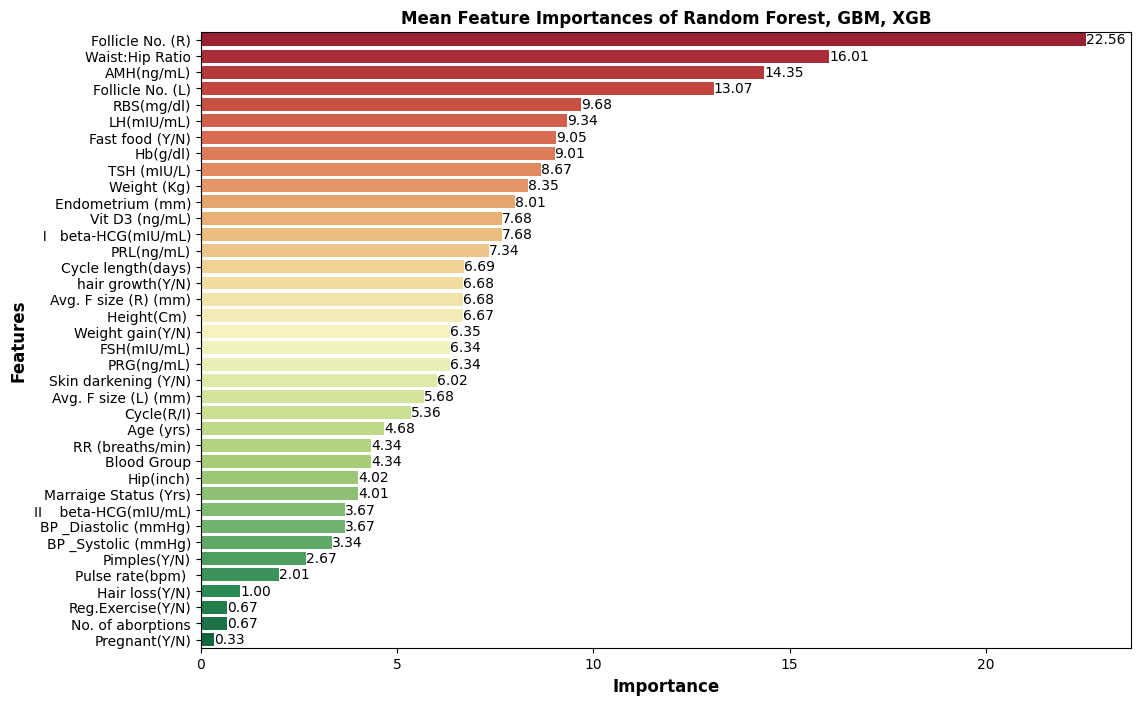

In [42]:
import seaborn as sns

mean_importance = pd.read_csv('mean_importances.csv')
# Desending order
mean_importance = mean_importance.sort_values(by='mean_importance', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='mean_importance', y='feature', data=mean_importance, orient='h', palette='RdYlGn')

# Add labels and title
plt.xlabel('Importance', fontweight='bold', fontsize=12)
plt.ylabel('Features', fontweight='bold', fontsize=12)
plt.title('Mean Feature Importances of Random Forest, GBM, XGB', fontweight='bold', fontsize=12)

# Annotate each bar with its mean importance value
for p in ax.patches:
    width = p.get_width()
    plt.text(width, p.get_y() + p.get_height() / 2, f'{width:.2f}', ha='left', va='center')

# Remove comment to save the graph
#plt.savefig('mean_importances.svg', format='svg', bbox_inches='tight')

# Show the plot
plt.show()
